<div class="alert block-alert alert-success">
    <h1>Task 4 - Testing of parametric hypotheses</h1><span class="tocSkip">
</div>

1. Постройте функцию, которая на вход берет два ряда и уровень значимости (альфа — это аргумент функции, который по умолчанию принимает значение 5%).
    
    Функция возвращает значение двухвыборочного t-критерия и соответствующее ему p_value. Также функция принтит, принимается ли нулевая гипотеза о равенстве средних или нет на основании полученного p_value.
    
    Примените данную функцию к файлу «Кредиты» (те же ряды, что и на вебинаре). 
    
2. Исследуйте принимаемость гипотезы H₀ в зависимости от размера выборки:
    - Создайте пустой лист **samples** и с помощью цикла while заполните его значения от 200 до размера выборки с шагом в 50 (так как объем выборки не кратен 50, внесите также в конце в этот лист оригинальный объем выборки).
    - Создайте датафрейм **df_res** с тремя колонками: sample_size, p_value, try.
    - Создайте цикл на 50 итераций: прогоните 50 раз t-test для каждого размера выборки. Попытка записывается в колонку try, размер выборки — в sample_size и результирующее p_value — в колонку p_value.
    - Сгруппируйте **df_res** и получите датафрейм **df_gr**, в котором для каждого размера выборки будет рассчитано среднее p_value (по всем попыткам).
    - Постройте график (lineplot из seaborn), который покажет зависимость усредненного p_value от размера выборки.

<div class="alert alert-block alert-info"> 
</div>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Функция-для-нахождения-двухвыборочного-t-критерия-и-p_value." data-toc-modified-id="Функция-для-нахождения-двухвыборочного-t-критерия-и-p_value.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Функция для нахождения двухвыборочного t-критерия и p_value.</a></span></li><li><span><a href="#Проверка-нулевой-гипотезы-о-равенстве-двух-выборок" data-toc-modified-id="Проверка-нулевой-гипотезы-о-равенстве-двух-выборок-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Проверка нулевой гипотезы о равенстве двух выборок</a></span></li><li><span><a href="#Принимаемость-гипотезы-H₀-в-зависимости-от-размера-выборки" data-toc-modified-id="Принимаемость-гипотезы-H₀-в-зависимости-от-размера-выборки-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Принимаемость гипотезы H₀ в зависимости от размера выборки</a></span><ul class="toc-item"><li><span><a href="#Построение-списка-размеров-выборок" data-toc-modified-id="Построение-списка-размеров-выборок-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Построение списка размеров выборок</a></span></li><li><span><a href="#Построение-массива-p-value-для-выборок-разного-размера-в-50-проходок-для-каждого" data-toc-modified-id="Построение-массива-p-value-для-выборок-разного-размера-в-50-проходок-для-каждого-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Построение массива p-value для выборок разного размера в 50 проходок для каждого</a></span></li><li><span><a href="#Построение-массива-средних-значение-p-value-по-всем-выборкам" data-toc-modified-id="Построение-массива-средних-значение-p-value-по-всем-выборкам-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Построение массива средних значение p-value по всем выборкам</a></span></li><li><span><a href="#Построение-графика-зависимости-усредненного-p_value-от-размера-выборки" data-toc-modified-id="Построение-графика-зависимости-усредненного-p_value-от-размера-выборки-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Построение графика зависимости усредненного p_value от размера выборки</a></span></li></ul></li></ul></div>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind
from scipy.stats import ttest_1samp

In [2]:
df = pd.read_csv('Кредиты.csv', sep = ';')
df.head(5)

,CREDIT1,CREDIT2
0,125000,100000
1,100000,150000
2,75000,100000
3,100000,100000
4,150000,100000


### Функция для нахождения двухвыборочного t-критерия и p_value.

In [3]:
def two_sample_ttest (a, b, alfa=0.05):
    """Рассчитывает T-статистику для средних значений двух независимых выборок.
    
    Parameters
    ----------
    a, b: array_like
        Массивы сравниваемых выборок.
    alfa: float
        Значение статистического критерия. 
        
    Returns
    -------
    statistic: float or array
        Вычисленная t-статистика.
    pvalue: float or array
        Вычисленная p-value.
    alfa: float
        Значение статистического критерия из условия.
    """
    #Calculate the T-test for the means of two independent samples of scores.
    s,p = ttest_ind(a, b)

    #Printing of conclusions
    if p > alfa:
        print('Нулевая гипотеза о равенстве средних принимается')
    else:
        print('Нулевая гипотеза о равенстве средних отвергается\
            \nв пользу гипотезы, что они не равны\n')
        
    #Returning required values from functions   
    return print(f' s= {s}, p={p}, alfa={alfa}')

p-value - вероятность того, что разница между двумя выборками случайна

### Проверка нулевой гипотезы о равенстве двух выборок

In [4]:
two_sample_ttest(df['CREDIT1'],df['CREDIT2'])

Нулевая гипотеза о равенстве средних отвергается            
в пользу гипотезы, что они не равны

 s= -2.1378360559262917, p=0.032675385935666205, alfa=0.05


### Принимаемость гипотезы H₀ в зависимости от размера выборки

#### Построение списка размеров выборок

In [5]:
# Список с размерами выборок

samples = []
i = 200
while i < len(df):
    samples.append(i)
    i += 50
samples.append(len(df))
print('размеры выборок из массивов:\nsamples =', samples)

размеры выборок из массивов:
samples = [200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 833]


#### Построение массива p-value для выборок разного размера в 50 проходок для каждого

In [6]:
# Датафрейм: p-value для выборок разного размера в 50 проходок для каждого

df_res = pd.DataFrame(columns=['sample_size', 'p_value', 'try'])

# Проходим по размерам выборок
for i in samples:
        
        # Проходим каждый размер по 50 раз
        for number in range(1, 51, 1):
            
            s,p = ttest_ind(df['CREDIT1'].sample(i),df['CREDIT2'].sample(i))
            new_row = pd.DataFrame(data = [{'sample_size' : i,
                                            'p_value' : p,
                                            'try' : number}])

            df_res = pd.concat([df_res, new_row], axis=0, ignore_index=True)
    
df_res

,sample_size,p_value,try
0,200,0.09162,1
1,200,0.03381,2
2,200,0.721059,3
3,200,0.880137,4
4,200,0.316145,5
...,...,...,...
695,833,0.032675,46
696,833,0.032675,47
697,833,0.032675,48
698,833,0.032675,49


#### Построение массива средних значение p-value по всем выборкам

In [7]:
# Среднее значение p-value по всем попыткам для выборок разного размера

df_gr = df_res.groupby(by='sample_size')['p_value'].mean()
df_gr                     

sample_size
200    0.345909
250    0.347826
300    0.327037
350    0.243582
400    0.242209
450    0.168321
500    0.217928
550    0.125854
600    0.102441
650    0.096736
700    0.077080
750    0.062604
800    0.042909
833    0.032675
Name: p_value, dtype: float64

#### Построение графика зависимости усредненного p_value от размера выборки

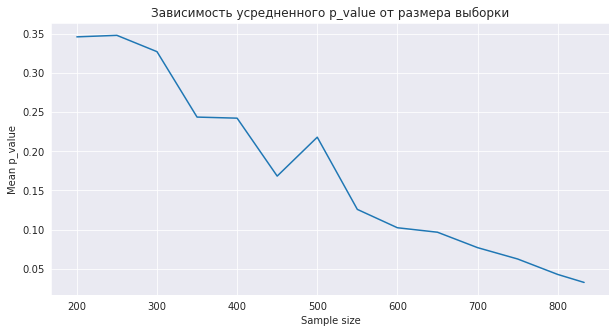

In [8]:
with sns.axes_style("darkgrid"):
    plt.figure(figsize=(10,5))
    sns.lineplot(data = df_gr)
    plt.title('Зависимость усредненного p_value от размера выборки')
    plt.ylabel('Mean p_value')
    plt.xlabel('Sample size')
plt.show()

<div class="alert alert-block alert-warning"> 
При увеличении количества экспериментов среднее p-value уменьшается.
</div>